In [7]:
#Importa libs utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np

In [3]:
#Cria interface visual para selecionar o arquivo 'addresses.csv' localizado na pasta data
Tk().withdraw()
file = askopenfilename()


In [4]:
#Cria o dataframe a partir do csv carregado e padroniza os valores None/NaN
df = pd.read_csv(file)
df.style.format(na_rep='Missing')

,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472
5,JUN,435,472,535
6,JUL,491,548,622
7,AUG,505,559,606
8,SEP,404,463,508
9,OCT,359,407,461


In [60]:
dictionary = {}
years = list(df.head(0))[1:]
for year in years:
    year_formated = int(year.replace('"', ''))
    dictionary[year_formated] = {}
    for value in df.values:
        dictionary[year_formated][value[0]] = [value[1], value[2], value[3]]
print(dictionary)

{1958: {'JAN': [340, 360, 417], 'FEB': [318, 342, 391], 'MAR': [362, 406, 419], 'APR': [348, 396, 461], 'MAY': [363, 420, 472], 'JUN': [435, 472, 535], 'JUL': [491, 548, 622], 'AUG': [505, 559, 606], 'SEP': [404, 463, 508], 'OCT': [359, 407, 461], 'NOV': [310, 362, 390], 'DEC': [337, 405, 432]}, 1959: {'JAN': [340, 360, 417], 'FEB': [318, 342, 391], 'MAR': [362, 406, 419], 'APR': [348, 396, 461], 'MAY': [363, 420, 472], 'JUN': [435, 472, 535], 'JUL': [491, 548, 622], 'AUG': [505, 559, 606], 'SEP': [404, 463, 508], 'OCT': [359, 407, 461], 'NOV': [310, 362, 390], 'DEC': [337, 405, 432]}, 1960: {'JAN': [340, 360, 417], 'FEB': [318, 342, 391], 'MAR': [362, 406, 419], 'APR': [348, 396, 461], 'MAY': [363, 420, 472], 'JUN': [435, 472, 535], 'JUL': [491, 548, 622], 'AUG': [505, 559, 606], 'SEP': [404, 463, 508], 'OCT': [359, 407, 461], 'NOV': [310, 362, 390], 'DEC': [337, 405, 432]}}


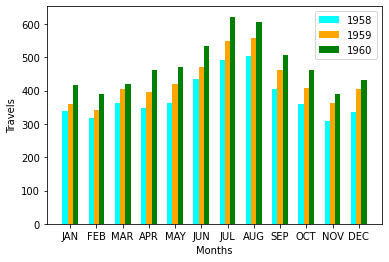

In [104]:
legend = list(dictionary.keys())
y = [y for y in dictionary[year_formated].values()]
labels = [label for label in dictionary[year_formated]]
ano1 = []
ano2 = []
ano3 = []
for x in y:
    ano1.append(x[0])
    ano2.append(x[1])
    ano3.append(x[2])

x = np.arange(len(labels))
width = 0.2

plt.bar(x-0.2, ano1, width, color='cyan')
plt.bar(x, ano2, width, color='orange')
plt.bar(x+0.2, ano3, width, color='green')
plt.xticks(x, labels)
plt.xlabel("Months")
plt.ylabel("Travels")
plt.legend(legend)
plt.show()
    
